In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import glob
import os
from matplotlib import cm
import pickle

In [2]:
jetdic = pickle.load( open( "../JET_OUT/jettrack_2D.p", "rb" ) )
pvdic = pickle.load( open( "../JET_OUT/jettrack_2D_pv.p", "rb" ) )
cordic = pickle.load( open( "../JET_OUT/jettrack_2D_cor.p", "rb" ) )

In [3]:
jetdic['NOAA'].coords

Coordinates:
  * time     (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2005-12-01
  * lon      (lon) float64 -40.0 -38.0 -36.0 -34.0 -32.0 ... 24.0 26.0 28.0 30.0
  * lat      (lat) float64 -74.0 -72.0 -70.0 -68.0 ... -22.0 -20.0 -18.0 -16.0

In [4]:
cormax = max((np.nanmax(cordic[key].values) for key in cordic))
cormin = min((np.nanmin(cordic[key].values) for key in cordic))
levels = np.linspace(round(-0.7,1),round(0.7,1), 15)

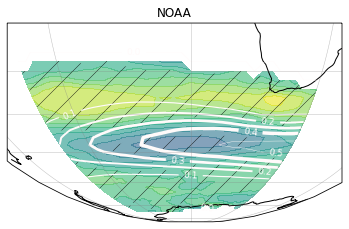

In [5]:
#for index in jetdic:
for index in ['NOAA']:
    ax = plt.axes(projection=ccrs.Orthographic())
    ax.coastlines()
    plt.rcParams['hatch.linewidth']=0.4
    plt.rcParams['hatch.color']='black'
    c = ax.contourf(cordic[index].lon,cordic[index].lat,cordic[index],levels=levels, transform = ccrs.PlateCarree(),alpha=0.6)
    sig = ax.contourf(pvdic[index].lon,pvdic[index].lat,pvdic[index],levels = [0,0.05], hatches=["/"], transform = ccrs.PlateCarree(),alpha=0)
    prob = ax.contour(jetdic[index].lon,jetdic[index].lat,jetdic[index].mean(dim='time'),vmin=0,vmax=1,colors = 'snow',levels = 5,linewidths=np.linspace(0.4,3.5,5), transform = ccrs.PlateCarree(),alpha=1)
    ax.clabel(prob, inline=True, fontsize=9)
    plt.title(str(index))
    ax.set_extent([-40, 32, -20, -85], ccrs.PlateCarree())
    #plt.colorbar(c)
    ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
    plt.savefig('../JET_OUT/correlation_plots/pdf/'+str(index)+'_Jet_correlation.pdf')
    plt.savefig('../JET_OUT/correlation_plots/png/'+str(index)+'_Jet_correlation.png',dpi=1200)
    plt.savefig('../JET_OUT/correlation_plots/svg/'+str(index)+'_Jet_correlation.svg', format='svg', dpi=1200)
    #plt.close()
    plt.show()


<ipython-input-6-5e83ed3988d6>:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(c, orientation = 'vertical')


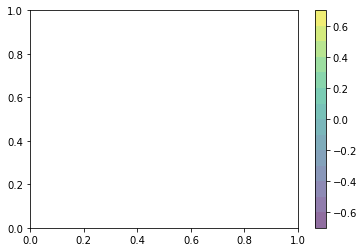

In [6]:
plt.colorbar(c, orientation = 'vertical')
plt.savefig('../JET_OUT/correlation_plots/pdf/cbar.pdf')
plt.show()

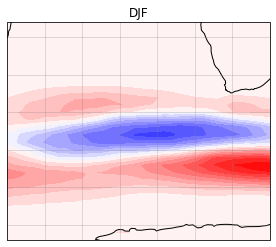

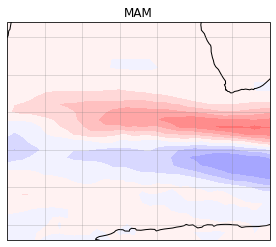

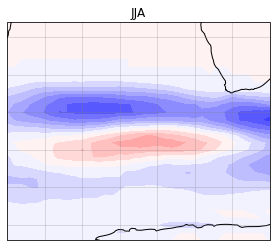

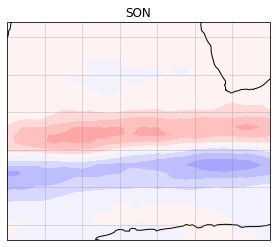

In [7]:
seas={}
for season in ['DJF','MAM','JJA','SON']:
    seas[season] = jetdic['NOAA'].where(jetdic['NOAA'].time.dt.season==season).mean(dim='time',skipna=True)


clim = jetdic['NOAA'].mean(dim='time',skipna=True)



levels = np.linspace(-0.15,0.15, 21)

for index in seas:
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    plt.rcParams['hatch.linewidth']=0.4
    plt.rcParams['hatch.color']='black'
    c = ax.contourf(clim.lon,clim.lat,seas[index]-clim,cmap='bwr_r',levels = levels,transform = ccrs.PlateCarree())
    plt.title(str(index))
    #ax.set_extent([-50, 32, -15, -85], ccrs.PlateCarree())
    #plt.colorbar(c)
    ax.gridlines(linewidth=0.5, color='gray', alpha=0.5)
    plt.savefig('../JET_OUT/NOAA_anom/'+str(index)+'_anom.pdf')
    plt.savefig('../JET_OUT/NOAA_anom/'+str(index)+'_anom.png',dpi=1200)
    plt.savefig('../JET_OUT/NOAA_anom/'+str(index)+'_anom.svg', format='svg', dpi=1200)
    plt.show()

<ipython-input-8-3f17d24fb6fc>:1: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(c, orientation = 'horizontal')


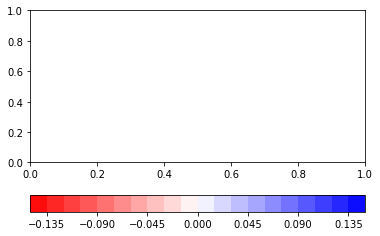

In [8]:
plt.colorbar(c, orientation = 'horizontal')
plt.savefig('../JET_OUT/NOAA_anom/colorbar_anom.pdf')
plt.show()